In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ph-recognition/ph-data.csv


In [2]:
data=pd.read_csv("/kaggle/input/ph-recognition/ph-data.csv")
data.head()

,blue,green,red,label
0,36,27,231,0
1,36,84,250,1
2,37,164,255,2
3,22,205,255,3
4,38,223,221,4


In [3]:
def acidnotrbase(row):
    if row['label'] < 7:
        return 0 
    elif row['label']>7: 
        return 1 
    else :
        return 2
data['type'] = data.apply(lambda row: acidnotrbase(row), axis=1)
data.head()

,blue,green,red,label,type
0,36,27,231,0,0
1,36,84,250,1,0
2,37,164,255,2,0
3,22,205,255,3,0
4,38,223,221,4,0


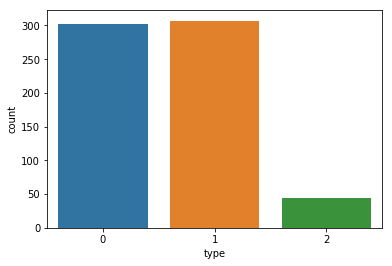

In [4]:
%matplotlib inline
import seaborn as sns
sns.countplot(x=data["type"])

0 is acid, 1 is base, 2 is notr.

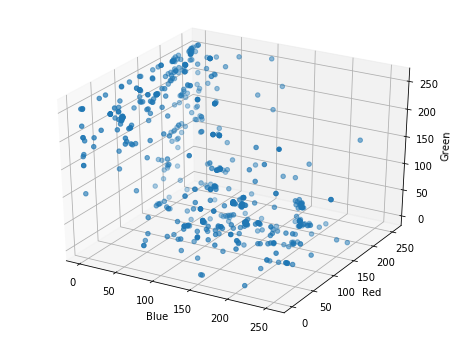

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = data["blue"]
ys = data['green']
zs = data['red']
import matplotlib.cm as cm
ax.scatter(xs, ys, zs,label=data["type"],cmap='viridis')

ax.set_xlabel('Blue')
ax.set_ylabel('Red')
ax.set_zlabel('Green')
plt.show()

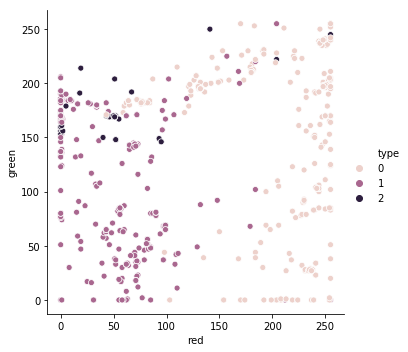

In [6]:
sns.relplot(data=data,x="red",y="green",hue="type")

Acid and Base Nearly Clearly Separable with red and green

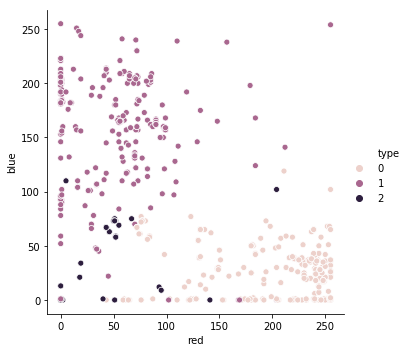

In [7]:
sns.relplot(data=data,x="red",y="blue",hue="type")

Acid and Base is Clearly Separable Still.

## Use Tsne and make the data 2 dimensional

In [8]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2)
x=data.iloc[:,0:3]
x_tsne=tsne.fit_transform(x)

In [9]:
xtes=pd.DataFrame(x_tsne)
xtes.columns = ['b', 'i']
xtes.head()

,b,i
0,8.494301,-31.872189
1,-3.116741,-25.179737
2,-10.949647,-20.090759
3,-14.047554,-16.884594
4,-20.326401,-6.649547


In [10]:
xtes["type"]=data["type"]

In [11]:
xtes.head()

,b,i,type
0,8.494301,-31.872189,0
1,-3.116741,-25.179737,0
2,-10.949647,-20.090759,0
3,-14.047554,-16.884594,0
4,-20.326401,-6.649547,0


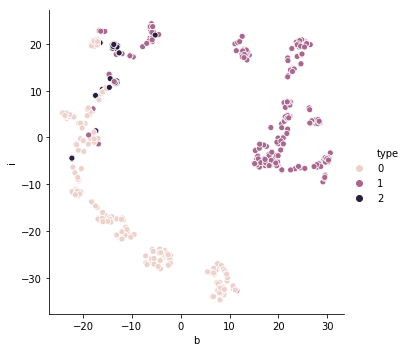

In [12]:
sns.relplot(data=xtes,x="b",y="i",hue="type")

## Notr can't separable easily. Maybe in this dataset 7 isn't notr.

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
rgb=data[["blue","red","green"]]
x_lda=lda.fit_transform(rgb,data["type"])

In [14]:
xlda=pd.DataFrame(x_lda)
xlda.columns = ['ld', 'a']
xlda["type"]=data["type"]
xlda.head()

,ld,a,type
0,-1.864002,-1.028618,0
1,-2.282764,-1.226469,0
2,-2.607674,-1.181784,0
3,-3.033512,-0.863679,0
4,-2.417567,-0.563797,0


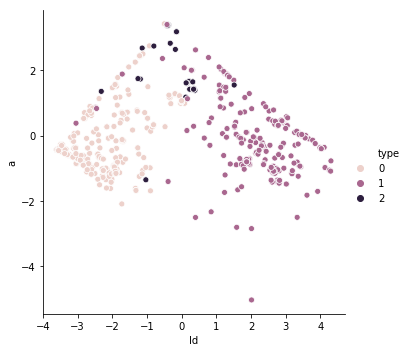

In [15]:
sns.relplot(data=xlda,x="ld",y="a",hue="type")

Notr is always problem but LDa is better than TSNE

## I use KNN's 1NN because of Notrs.

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
from sklearn.model_selection import train_test_split
X=xlda[["ld","a"]]
y=data["type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
knn.fit(X_train,y_train)
ypred=knn.predict(X_test)

In [18]:
import sklearn.metrics as metrik
print(metrik.accuracy_score(y_true=y_test,y_pred=ypred))
print(metrik.confusion_matrix(y_true=y_test,y_pred=ypred))

0.9512195121951219
[[76  1  2]
 [ 0 77  2]
 [ 2  1  3]]


## KNN is work just fine. Notr is problem %50 of the time is true Notr only but dataset is this.